## Week1 - Exploratory Analysis

In [1]:
%matplotlib inline
import pandas as pd
import json
from pprint import pprint
from random import sample
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import numpy as np
import plotly.plotly as py

import plotly 
plotly.tools.set_credentials_file(username='kt426', api_key='GcKIXRGajqJ9KlQAcL2L')

In [2]:
def load_json_to_df(datapass):
    '''
    Load the json file and parse the file to pandas dataframe format
    
    Input:
        datapass(str) : directory to the json file
    Output:
        df(dataframe) : pandas dataframe object
    '''
    
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [3]:
DATAPASS1 = '../../yelp10/dataset/business.json'
business = load_json_to_df(DATAPASS1)

In [4]:
DATAPASS2 = '../../yelp10/dataset/user.json'
user = load_json_to_df(DATAPASS2)

In [7]:
DATAPASS4 = '../../yelp10/dataset/checkin.json'
checkin = load_json_to_df(DATAPASS4)

In [11]:
DATAPASS3 = '../../yelp10/dataset/tip.json'
tip = load_json_to_df(DATAPASS3)

### How large is the data?

In [9]:
print ('{} business'.format(business.shape[0]))
print ('{} users'.format(user.shape[0]))
print ('{} checkin'.format(checkin.shape[0]))
print ('{} tips'.format(tip.shape[0]))

156639 business
1183362 users
135148 checkin
1028802 tips


In [10]:
# duplicates?
print ('{} business id'.format(len(set(business['business_id']))))
print ('{} users id'.format(len(set(user['user_id']))))

156639 business id
1183362 users id


### What does the data look like?

### business

In [11]:
# business
print (business.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')


In [12]:
business.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [13]:
print ('{} unique state'.format(len(set(business['state']))))
print ('{} unique cities'.format(len(set(business['city']))))
print ('{} unique neighborhood\n'.format(len(set(business['neighborhood']))))

print ('{} open business'.format(business['is_open'].sum()))
print ('{} close business'.format(business.shape[0] - business['is_open'].sum()))

51 unique state
1010 unique cities
383 unique neighborhood

132262 open business
24377 close business


#### Review count

In [14]:
# review count and stars
print ('mean review count : {}'.format(business['review_count'].mean()))
print ('std review count : {}'.format(business['review_count'].std()))

mean review count : 30.23815907915653
std review count : 96.48663109957913


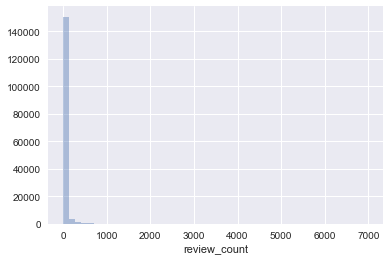

In [15]:
sns.distplot(business['review_count'], kde=False)

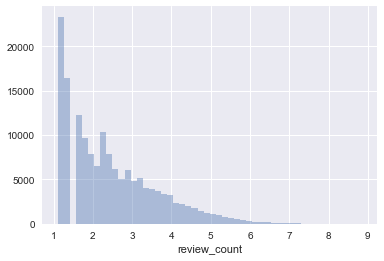

In [16]:
sns.distplot(np.log(business['review_count']), kde=False)

#### Star counts

In [17]:
print ('mean stars count : {}'.format(business['stars'].mean()))
print ('std stars count : {}'.format(business['stars'].std()))

mean stars count : 3.6471536462822156
std stars count : 0.9776404753138286


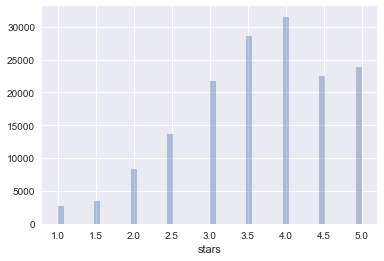

In [18]:
sns.distplot(business['stars'], kde=False)

#### Geological mapping

In [19]:
business.groupby('state').count().sort_values(by = 'business_id', ascending = False)['business_id'][:10]

state
AZ     47376
NV     30571
ON     26520
NC     11299
OH     10930
PA      8916
QC      7273
WI      4190
EDH     3561
BW      3071
Name: business_id, dtype: int64

In [20]:
business.groupby('state').sum().sort_values(by = 'review_count', ascending = False)['review_count'][:10]

state
NV     1650578
AZ     1459409
ON      570082
NC      272977
OH      219072
PA      206301
QC      129961
WI       99828
EDH      45495
BW       34695
Name: review_count, dtype: int64

In [23]:
data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = business.groupby('state').count().sort_values(by = 'business_id', ascending = False)['business_id'].keys(),
        z = np.log(business.groupby('state').count().sort_values(by = 'business_id', ascending = False)['business_id'].values),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        ) ]

layout = dict(
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot(fig)

In [24]:
data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = business.groupby('state').sum().sort_values(by = 'review_count', ascending = False)['review_count'].keys(),
        z = np.log(business.groupby('state').sum().sort_values(by = 'review_count', ascending = False)['review_count'].values),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        ) ]

layout = dict(
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot(fig)

### User

In [25]:
user.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,...,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31


In [26]:
user.keys()

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [27]:
import time
import datetime

user['joined_year'] = [datetime.datetime.strptime(t, "%Y-%m-%d").year for t in user['yelping_since']]

In [28]:
user.groupby('joined_year').count()['user_id']

joined_year
2004        73
2005       959
2006      5812
2007     15950
2008     31284
2009     58336
2010     94826
2011    142915
2012    150292
2013    165652
2014    181419
2015    173071
2016    121251
2017     41522
Name: user_id, dtype: int64

In [29]:
import plotly.graph_objs as go
data = [go.Scatter(x=user.groupby('joined_year').count()['user_id'].keys(), y=user.groupby('joined_year').count()['user_id'].values)]
layout = go.Layout( title='New Yelp User',
    xaxis={'title':'Year'},
    yaxis={'title':'Number of new users'},
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [30]:
data = [go.Scatter(x=user.groupby('yelping_since').count()['user_id'].keys()\
                   ,y=user.groupby('yelping_since').count()['user_id'].values)]
layout = go.Layout( title='New Yelp User',
    xaxis={'title':'Year'},
    yaxis={'title':'Number of new users'},
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [7]:
business.head(1)['attributes'].values

array([ {'RestaurantsPriceRange2': 2, 'BusinessParking': {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}, 'BikeParking': True, 'WheelchairAccessible': True},
       {'GoodForMeal': {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}, 'HasTV': False, 'RestaurantsGoodForGroups': True, 'NoiseLevel': 'average', 'RestaurantsAttire': 'casual', 'RestaurantsReservations': False, 'OutdoorSeating': False, 'BusinessAcceptsCreditCards': False, 'RestaurantsPriceRange2': 2, 'RestaurantsDelivery': True, 'Ambience': {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}, 'RestaurantsTakeOut': True, 'GoodForKids': True},
       {'BusinessParking': {'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}, 'WiFi': 'no', 'OutdoorSeating': False, 'BusinessAcceptsCreditCards': True, 'R

In [9]:
business.iloc[0]

address                                           691 Richmond Rd
attributes      {'RestaurantsPriceRange2': 2, 'BusinessParking...
business_id                                YDf95gJZaq05wvo7hTQbbQ
categories                           [Shopping, Shopping Centers]
city                                             Richmond Heights
hours           {'Monday': '10:00-21:00', 'Tuesday': '10:00-21...
is_open                                                         1
latitude                                                  41.5417
longitude                                                -81.4931
name                                         Richmond Town Square
neighborhood                                                     
postal_code                                                 44143
review_count                                                   17
stars                                                           2
state                                                          OH
Name: 0, d

In [13]:
tip.head(3)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
